# Model Building

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

### Loading data

In [2]:
import os
os.getcwd()

'E:\\Internship\\Task 1. Bank Customer Churn Prediction\\project Bank Customer Churn Prediction'

In [3]:
path = '/Internship/Task 1. Bank Customer Churn Prediction/project Bank Customer Churn Prediction/data/Churn_prediction_data.csv'

In [4]:
df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.502155,0.558140,0.2,0.000000,0.0,1,1,0.506735,1,1,0,0,1,0
1,0.478448,0.534884,0.1,0.334031,0.0,0,1,0.562709,0,0,0,1,1,0
2,0.250000,0.558140,0.8,0.636357,1.0,1,0,0.569654,1,1,0,0,1,0
3,0.674569,0.488372,0.1,0.000000,0.5,0,0,0.469120,0,1,0,0,1,0
4,1.000000,0.581395,0.2,0.500246,0.0,1,1,0.395400,0,0,0,1,1,0


In [5]:
df.shape

(9515, 14)

In [6]:
df.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

### Checking Balance data ?

In [7]:
df['Exited'].value_counts()

Exited
0    7646
1    1869
Name: count, dtype: int64

<AxesSubplot: xlabel='Exited', ylabel='count'>

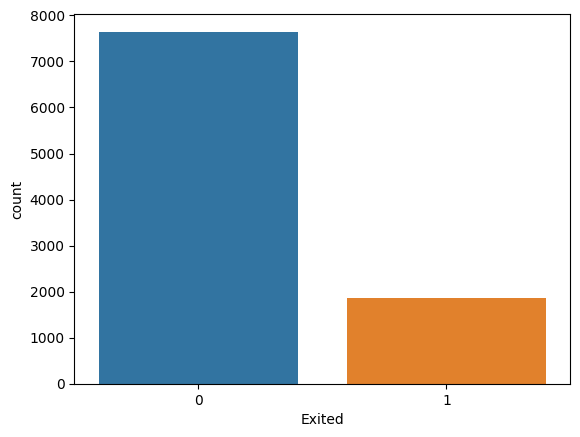

In [8]:
# seems like data is imbalace the proportion is imbalance

sns.countplot(data= df, x="Exited") 

### Balancinng data by smote technique

In [9]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, y)

Y_sm.value_counts()

Exited
1    7646
0    7646
Name: count, dtype: int64

In [11]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10704, 13)
(4588, 13)
(10704,)
(4588,)


In [12]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# iterating over classifiers
for clf, clf_algo in classifiers:
    
    # applying k-fold cross validation score
    scores = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='accuracy')
    
    # calculating average performance of the metrics
    avg_score = scores.mean()
    
    # calculating average precision of classifiers
    avg_precision = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='precision_macro').mean()
    
    # calculating average recall of classifiers
    avg_recall = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='recall_macro').mean()
     
    # Print the performance metrics
    print(f'Classifier: {clf}')
    print(f'Average Accuracy: {avg_score:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.7286
Average Precision: 0.7288
Average Recall: 0.7286
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.8242
Average Precision: 0.8206
Average Recall: 0.8224
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8816
Average Precision: 0.8792
Average Recall: 0.8818
-----------------------
Classifier: KNN
Average Accuracy: 0.8199
Average Precision: 0.8272
Average Recall: 0.8195
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.7283
Average Precision: 0.7284
Average Recall: 0.7283
-----------------------
Classifier: XGB
Average Accuracy: 0.9041
Average Precision: 0.9050
Average Recall: 0.9042
-----------------------


### Hyperparameter tuning

In [13]:
## Creating the Random Forest classifier
#xgb_model = xgb.XGBClassifier()
#
## tuning parameters
#params = {
#    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#    'max_depth' : np.arange(3,15),
#    'min_child_weight' : [1, 3, 5, 7],
#    'gamma': [0.0, 0.4, 0.5, 0.7],
#    'colsample_bytree' : [0.3,0.4,0.5,0.7]
#}
#
## finding optimum parameters for the model
#rmscv = xgb.XGBClassifier(
#    estimator = xgb_model, 
#    param_distributions=params,
#    cv=10
#)
#
## training the parameter
#rmscv.fit(X_train, y_train)

In [14]:
# get the best parameters
# rmscv.best_params_

In [15]:
# rmscv.best_estimator_

### Training a model with best paramters

In [16]:
# Creating the Random Forest classifier
xgb_model = xgb.XGBClassifier(
    min_child_weight =  1,
    max_depth = 10,
    learning_rate = 0.25,
    gamma = 0.5,
    colsample_bytree =  0.7
)

# Training the classifier
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
xgb_model.score(X_train, y_train)

0.9985986547085202

### Model Evaluation

In [17]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report\n")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True,fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2318
           1       0.92      0.88      0.90      2270

    accuracy                           0.91      4588
   macro avg       0.91      0.91      0.91      4588
weighted avg       0.91      0.91      0.91      4588


---------------------------------------------



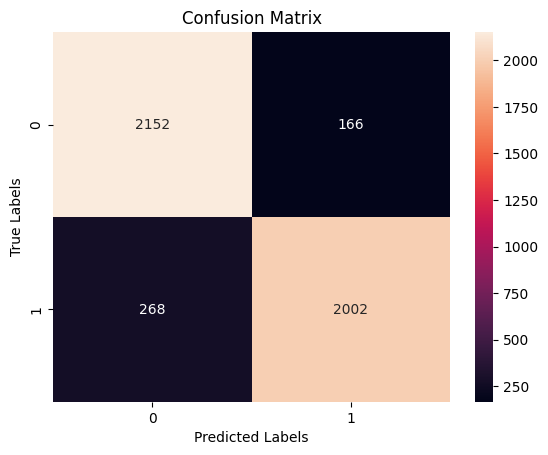

In [18]:
# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [19]:
path = '/Internship/Task 1. Bank Customer Churn Prediction/project Bank Customer Churn Prediction/model'

In [25]:
import pickle
pickle.dump(xgb_model, open(f"{path}/model2.pkl", "wb"))